In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)
train_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
print("Path to train files:", train_path)
print("Path to test files:", test_path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2
Path to train files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Path to test files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid


In [ ]:
clases = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Tomato___Late_blight",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___healthy"
]

In [ ]:
import os
ruta = train_path
carpetas = os.listdir(ruta)
carpetas.sort()
for carpeta in carpetas:
  print(carpeta)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


In [ ]:
import os
def length_of_folders(path, clases):
  lista  = []
  for clase in clases:
    ruta = path + '/' + clase
    imagenes = os.listdir(ruta)
    tupla = (len(imagenes),clase)
    lista.append(tupla)
    #print(f"{len(imagenes)}: {clase}")
  lista.sort()
  for tupla in lista:
    print(f"{tupla[0]}: {tupla[1]}")
  return min(lista)[0]
# print(length)
train_len = length_of_folders(train_path, clases)
print(train_len)
test_len = length_of_folders(test_path, clases)
print(test_len)

1642: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
1692: Grape___healthy
1722: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
1745: Tomato___Septoria_leaf_spot
1851: Tomato___Late_blight
1859: Corn_(maize)___healthy
1908: Corn_(maize)___Northern_Leaf_Blight
1920: Grape___Esca_(Black_Measles)
1926: Tomato___healthy
1987: Apple___Black_rot
2008: Apple___healthy
2016: Apple___Apple_scab
1642
410: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
423: Grape___healthy
430: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
436: Tomato___Septoria_leaf_spot
463: Tomato___Late_blight
465: Corn_(maize)___healthy
477: Corn_(maize)___Northern_Leaf_Blight
480: Grape___Esca_(Black_Measles)
481: Tomato___healthy
497: Apple___Black_rot
502: Apple___healthy
504: Apple___Apple_scab
410


In [ ]:
import shutil
import os
import cv2
import numpy as np

def crear_data_grayscale(carpeta_fuente, carpeta_destino, num):
  imagenes = os.listdir(carpeta_fuente)
  for i, nombreimg in enumerate(imagenes):
    if i < num:
      ruta = carpeta_fuente + '/' + nombreimg
      image = cv2.imread(ruta)
      if image is None:
          print("Error: No se pudo cargar la imagen.")
          continue
      gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      if not os.path.exists(carpeta_destino):
          os.makedirs(carpeta_destino)
      cv2.imwrite(carpeta_destino + '/' + nombreimg, gray_image)
  imagenes_salidas = os.listdir(carpeta_destino)
  print(len(imagenes_salidas))

In [ ]:
import shutil
import os

def crear_data(carpeta_fuente, carpeta_destino, num):
  imagenes = os.listdir(carpeta_fuente)
  if not os.path.exists(carpeta_destino):
          os.makedirs(carpeta_destino)
  for i, nombreimg in enumerate(imagenes):
    if i < num:
      #Copia de la carpeta fuente a la destino
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)
  imagenes_salidas = os.listdir(carpeta_destino)
  print(len(imagenes_salidas))


In [ ]:
def usar_funcion_de_carpetas(carpeta_fuente, carpeta_destino, clases, funcion, num):
  for clase in clases:
    fuente = carpeta_fuente + '/' + clase
    destino = carpeta_destino + '/' + clase
    funcion(fuente, destino, num)

In [ ]:
fuente = train_path
destino = "/content/train"
usar_funcion_de_carpetas(fuente, destino, clases, crear_data_grayscale, train_len)
fuente = test_path
destino = "/content/test"
usar_funcion_de_carpetas(fuente, destino, clases, crear_data_grayscale, test_len)

1642
1642
1642
1642
1642
1642
1642
1642
1642
1642
1642
1642
410
410
410
410
410
410
410
410
410
410
410
410


In [ ]:
color = "grayscale"

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# 1. Configurar rutas y parámetros
dataset_train_path = "/content/train"
dataset_test_path = "/content/test"  # Cambia esto a la ruta de tu dataset
target_size = (128, 128)  # Redimensionar a 256x256
batch_size = 32
epochs = 20
saved_models = "/content/saved_models"
# 2. Preprocesamiento y aumento de datos
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,  # Normalización de píxeles
    rotation_range = 20,  # Rotación aleatoria
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

# 3. Cargar las imágenes de las 4 clases
train_gen = datagen.flow_from_directory(
    dataset_train_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = color,
    class_mode = 'categorical',  # Clasificación multiclase
    classes = clases
)

valid_gen = datagen.flow_from_directory(
    dataset_test_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = color,
    class_mode = 'categorical',  # Clasificación multiclase
    classes = clases
)

# 4. Construir el modelo
Model = Sequential([
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu', input_shape=(target_size[0], target_size[1],1)),
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),


    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(os.listdir('/content/train')), activation='softmax') ])

# 5. Compilar el modelo
Model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Resumen del modelo
Model.summary()
if not os.path.exists(saved_models):
  os.makedirs(saved_models)
filepath= "/content/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss.
checkpoint = ModelCheckpoint(filepath, monitor ='val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
# 7. Callback para EarlyStopping
early_stop = EarlyStopping(
    monitor ='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience = 5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos encontrados
)

callbacks_list = [checkpoint, early_stop]
# 8. Entrenar el modelo con EarlyStopping
history = Model.fit(
    train_gen,
    epochs = epochs,
    validation_data=valid_gen,
    callbacks=callbacks_list,
    verbose=1

    )

# 9. Evaluar el modelo
loss, accuracy = Model.evaluate(valid_gen)
print(f"Pérdida en validación: {loss}")
print(f"Precisión en validación: {accuracy}")

# 10. Guardar el modelo
Model.save("new_model_hackaton_version.keras")

Found 19704 images belonging to 12 classes.
Found 4920 images belonging to 12 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 10,247,180 (39.09 MB)

 Trainable params: 10,243,980 (39.08 MB)

 Non-trainable params: 3,200 (12.50 KB)

Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3800 - loss: 1.9583
Epoch 1: val_accuracy improved from -inf to 0.30955, saving model to /content/saved_models/weights-improvement-01-0.31.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 122s 163ms/step - accuracy: 0.3802 - loss: 1.9576 - val_accuracy: 0.3096 - val_loss: 2.4847
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6977 - loss: 0.9340
Epoch 2: val_accuracy improved from 0.30955 to 0.56585, saving model to /content/saved_models/weights-improvement-02-0.57.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 83s 135ms/step - accuracy: 0.6978 - loss: 0.9339 - val_accuracy: 0.5659 - val_loss: 1.3673
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8045 - loss: 0.6219
Epoch 3: val_accuracy did not improve from 0.56585
616/616 ━━━━━━━━━━━━━━━━━━━━ 83s 134ms/step - accuracy: 0.8045 - loss: 0.6218 - val_accuracy: 0.4953 - val_loss: 1.8108
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.848

NameError: name 'history' is not defined

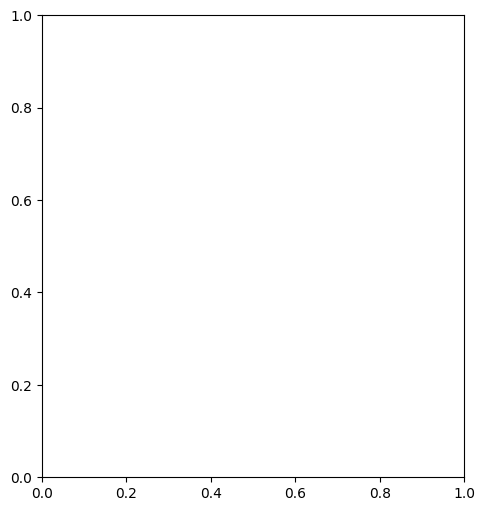

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Graficar la pérdida y la precisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# 2. Graficar la matriz de confusión
valid_gen.reset()
predictions = Model.predict(valid_gen, steps=valid_gen.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = valid_gen.classes[valid_gen.index_array[:len(predicted_classes)]]

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=valid_gen.class_indices.keys(),
            yticklabels=valid_gen.class_indices.keys())
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import pyautogui
from PIL import Image

# 1. Cargar el modelo entrenado
model = tf.keras.models.load_model("new_model_hackaton_version.keras")  # Asegúrate de que el modelo esté en la ruta correcta

# 2. Definir el tamaño de la región de la pantalla a capturar
screen_width, screen_height = 260, 260  # Resolución de 400x400

# 3. Definir las etiquetas de las clases
class_names = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Tomato___Late_blight",
    "Tomato___Septoria_leaf_spot",
    "Tomato___healthy"
]

# 4. Función para preprocesar la imagen
def preprocess_image(image):
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Redimensionar a 256x256 (tamaño esperado por el modelo)
    resized_image = cv2.resize(gray_image, (128, 128))
    # Normalizar los valores de píxeles
    normalized_image = resized_image / 255.0
    # Expandir dimensiones para que coincida con la entrada del modelo (256, 256, 1)
    input_image = np.expand_dims(normalized_image, axis=-1)
    input_image = np.expand_dims(input_image, axis=0)  # Añadir dimensión del batch
    return input_image

# 5. Función para predecir la clase y la confianza
def predict_plant(image):
    # Preprocesar la imagen
    input_image = preprocess_image(image)
    # Realizar la predicción
    predictions = model.predict(input_image)
    # Obtener la clase predicha y su confianza
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Índice de la clase predicha
    predicted_class_name = class_names[predicted_class_index]  # Nombre de la clase predicha
    confidence = np.max(predictions)  # Confianza de la predicción (valor máximo del array de predicciones)
    return predicted_class_name, confidence

# 6. Capturar la pantalla en tiempo real y realizar predicciones
print("Iniciando detección en tiempo real...")
while True:
    # Capturar la pantalla
    screenshot = pyautogui.screenshot(region=(290, 370, screen_width, screen_height))
    screenshot = np.array(screenshot)  # Convertir a un array de NumPy
    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2BGR)  # Convertir a BGR (OpenCV usa BGR por defecto)

    # Realizar la predicción
    predicted_class_name, confidence = predict_plant(screenshot)

    # Mostrar el resultado en la pantalla
    label = f"{predicted_class_name} ({confidence * 100:.2f}%)"  # Formato: "Clase (Confianza %)"

    # Mostrar el texto en la pantalla
    cv2.putText(screenshot, f"-> {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, .7, (255, 255, 255), 2)
    cv2.putText(screenshot, f"Confianza: {confidence:.2f}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, .7, (255, 255, 255), 2)

    # Mostrar la imagen en una ventana
    cv2.imshow("Detección en tiempo real", screenshot)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cerrar la ventana
cv2.destroyAllWindows()